In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('nama.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
b, g, r = cv2.split(img)

In [4]:
img_kontras = cv2.merge([b, g, r])

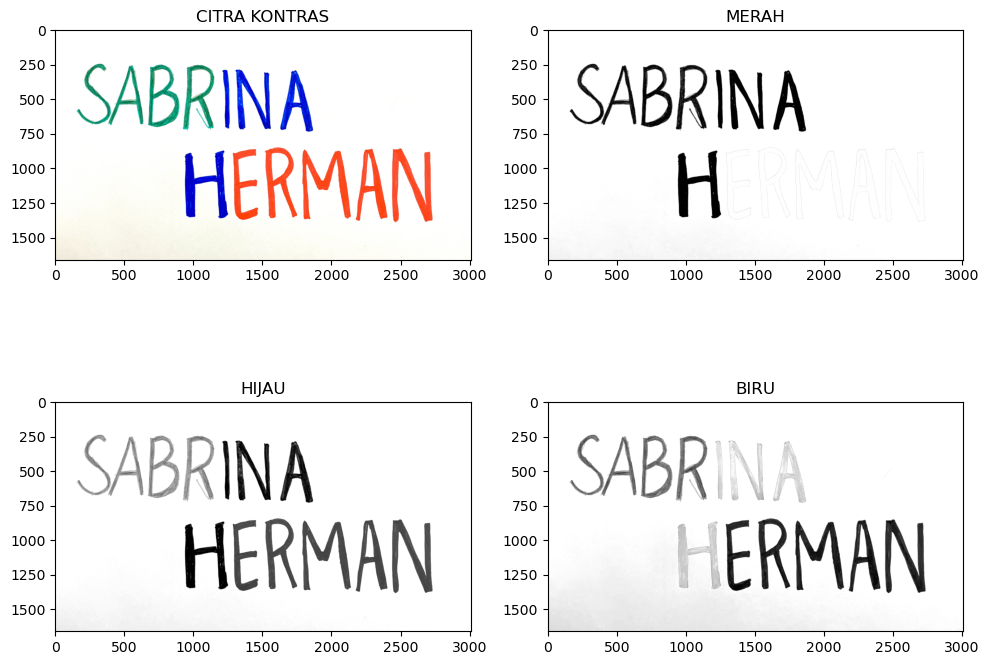

In [5]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")

plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title("MERAH")

plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title("HIJAU")

plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title("BIRU")

plt.tight_layout()
plt.show()

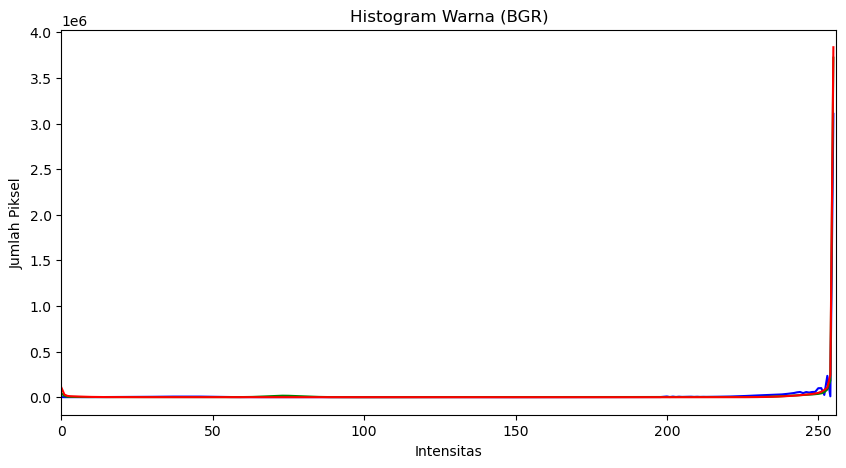

In [6]:
plt.figure(figsize=(10, 5))
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Histogram Warna (BGR)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.show()

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [8]:
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

In [9]:
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

In [10]:
res_red = cv2.bitwise_and(img, img, mask=mask_red)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, black_img = cv2.threshold(gray, 255, 255, cv2.THRESH_BINARY)  

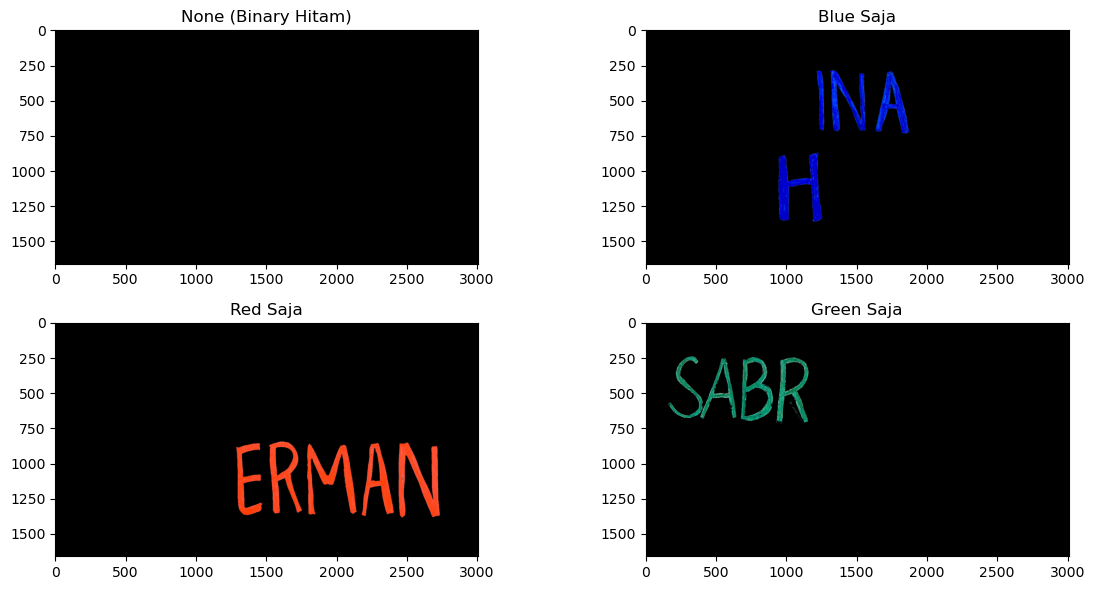

In [12]:
titles = ["None (Binary Hitam)", "Blue Saja", "Red Saja", "Green Saja"]
images = [black_img,
          cv2.cvtColor(res_blue, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    cmap = 'gray' if i == 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

In [13]:
img_backlight = cv2.imread("backlight.png")

In [14]:
gray = cv2.cvtColor(img_backlight, cv2.COLOR_BGR2GRAY)

In [15]:
bright = cv2.convertScaleAbs(gray, alpha=1.5, beta=50)  # lebih cerah

In [16]:
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0)  # lebih kontras

In [17]:
bright_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=40)

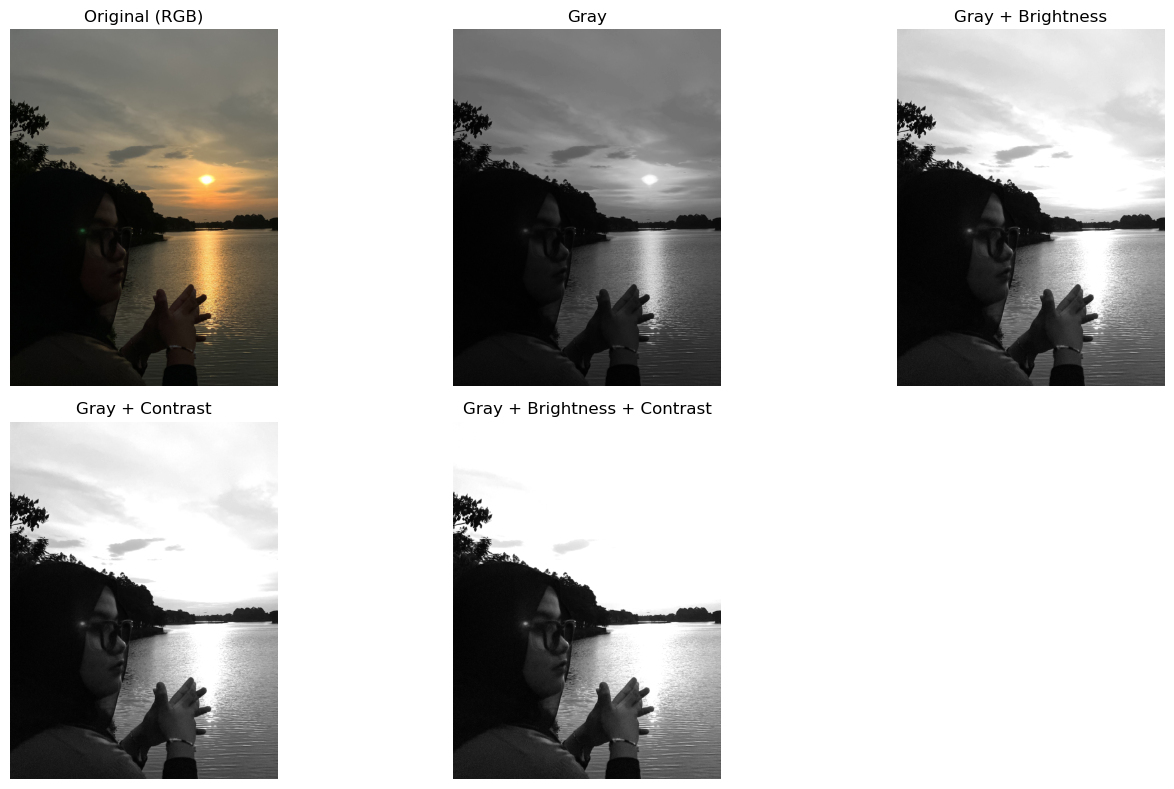

In [18]:
titles = [
    "Original (RGB)",
    "Gray",
    "Gray + Brightness",
    "Gray + Contrast",
    "Gray + Brightness + Contrast"
]

images = [
    cv2.cvtColor(img_backlight, cv2.COLOR_BGR2RGB),
    gray,
    bright,
    contrast,
    bright_contrast
]

plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    cmap = 'gray' if i > 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

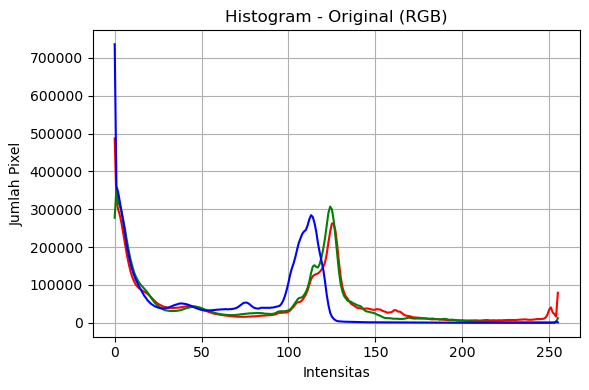

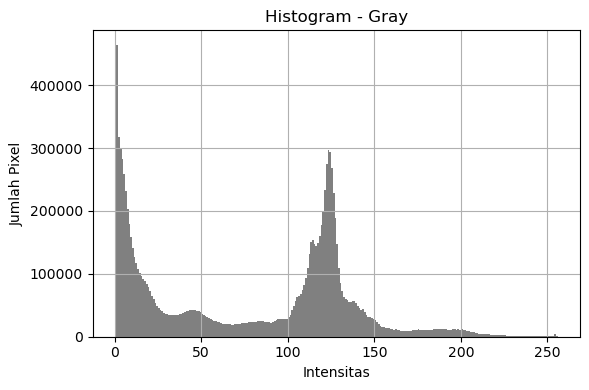

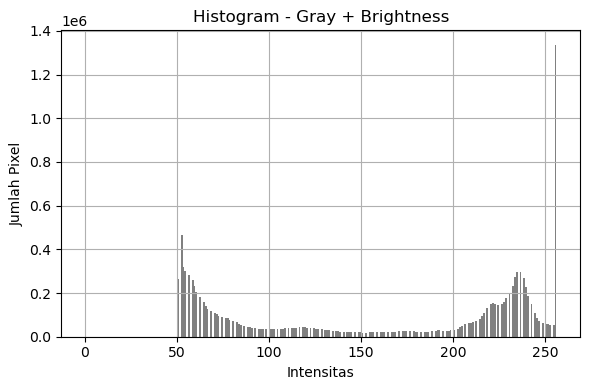

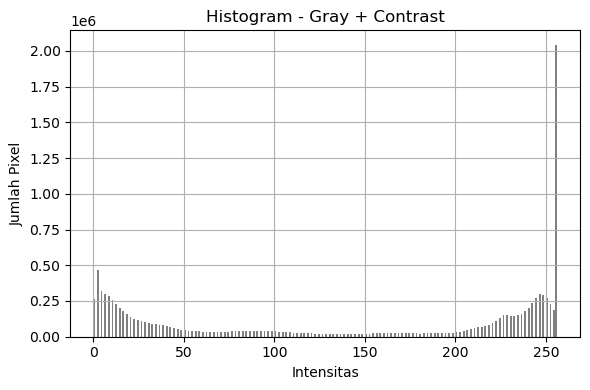

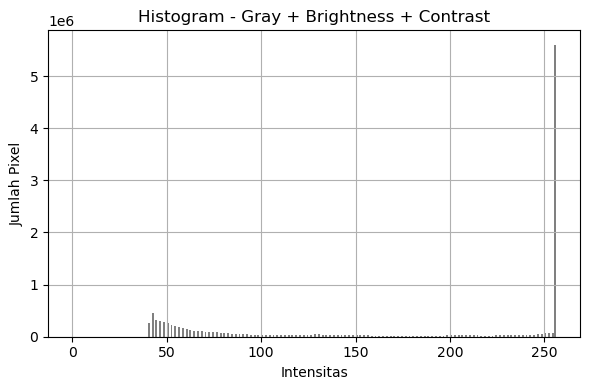

In [19]:
for i in range(5):
    plt.figure(figsize=(6, 4))
    plt.title(f"Histogram - {titles[i]}")
    
    if len(images[i].shape) == 2:  # Grayscale
        plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='gray')
    else:  # RGB
        colors = ('r', 'g', 'b')
        for j, col in enumerate(colors):
            hist = cv2.calcHist([images[i]], [j], None, [256], [0, 256])
            plt.plot(hist, color=col)
    
    plt.xlabel("Intensitas")
    plt.ylabel("Jumlah Pixel")
    plt.grid(True)
    plt.tight_layout()
    plt.show()